In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
centroids=[(-5,-5),(5,5)]
cluster_std=[1,1]

In [3]:
X,y=make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

In [4]:
X

array([[-5.3135082 , -4.22898826],
       [-5.65325027, -4.15754372],
       [-4.49711858, -6.24528809],
       [-4.30488039, -7.03346655],
       [ 5.36505352,  5.77408203],
       [-5.26905696, -2.76863321],
       [-7.1361961 , -3.35972919],
       [ 5.79918   ,  6.26261366],
       [-7.04032305, -4.95374448],
       [ 5.39652016,  4.68538256],
       [ 6.11788673,  4.72575791],
       [ 9.10869262,  5.82112088],
       [-4.49814279, -5.8442137 ],
       [ 5.61014409,  5.4234969 ],
       [ 3.54663565,  4.66198222],
       [ 6.53176032,  3.01415423],
       [ 4.67495037,  4.43976549],
       [-4.17529699, -3.75178708],
       [-5.46200535, -4.64911151],
       [-5.67767558, -6.43943903],
       [-3.63276458, -3.78211437],
       [-4.61813377, -4.43372456],
       [ 4.77175244,  2.93038774],
       [-4.44854596, -2.70779199],
       [ 5.96078194,  5.75837035],
       [-5.0191305 , -3.82499878],
       [ 4.53165374,  3.74527969],
       [-6.42121723, -5.1534952 ],
       [-5.38151648,

In [5]:
y

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

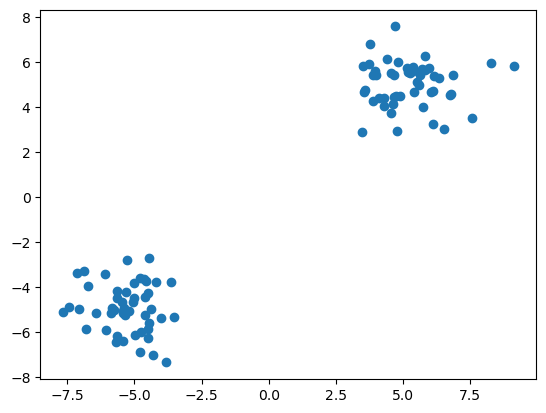

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [13]:
import random
import numpy as np

class Kmeans:
    def __init__(self,n_clusters=2,max_itr=100):
        self.n_clusters=n_clusters
        self.max_itr=max_itr
        self.centroids=None
        
    def fit_predict(self,X):
        random_index=random.sample(range(0,X.shape[0]), self.n_clusters)
        self.centroids=X[random_index]
        
        for i in range(self.max_itr):
            #assign clusters
            cluster_group=self.assign_clusters(X)
            
            #move centroids
            old_centroids=self.centroids
            self.centroids=self.move_centroids(X,cluster_group)
            
            #chek finish
            if(old_centroids==self.centroids).all():
                break
            
        return cluster_group    
            
            
    def assign_clusters(self,X):
        cluster_group=[]
        distance=[]
        
        for row in X:
            for centroid in self.centroids:
                distance.append( np.sqrt(np.dot(row-centroid,row-centroid)) )
#             print(distance)
            min_distance=min(distance)
            index_pos=distance.index(min_distance)
            cluster_group.append(index_pos)
            distance.clear()
        
        return np.array(cluster_group)
    
    
    def move_centroids(self,X,cluster_group):
        new_centroids=[]
        
        cluster_type=np.unique(cluster_group)
        
        for type in cluster_type:
            new_centroids.append( X[cluster_group==type].mean(axis=0) )
            
        return np.array(new_centroids)    
        
        
        

In [14]:
km=Kmeans(n_clusters=2,max_itr=100)
y_means= km.fit_predict(X)

In [15]:
y_means

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

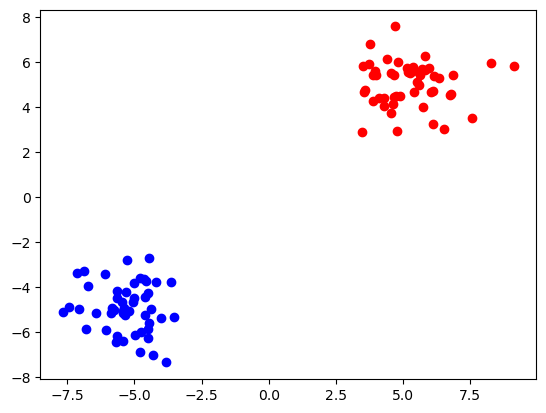

In [17]:
plt.scatter(X[y_means==0,0] , X[y_means==0,1] , color='red')
plt.scatter(X[y_means==1,0] , X[y_means==1,1] , color='blue')
plt.show()